# ДЗ к классификации и кластеризации

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию



In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn import datasets
import matplotlib . pyplot as plt
import seaborn as sns

In [ ]:
# загружаем набор данных
iris = datasets.load_iris()

In [ ]:
# Названия переменных
print(iris.feature_names)
# Целевая переменная:
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


набор данных состоит из длины/ширины двух типов лепестков Ириса: sepal и petal.   
Целевая переменная — это сорт Ириса: 0 — Setosa, 1 — Versicolor, 2 — Virginica

In [ ]:
iris = datasets.load_iris()
# добавляем наименование колонок как и имена переменных
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
data_class = iris.target
# добавляем столбец с целевой переменной
df_iris['variety'] = iris.target
# оставляем два признака (длина/ширина) для лепестка sepal
df_iris = df_iris.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
df_iris.head()

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [ ]:
df_iris.shape

(150, 3)

In [ ]:
df_iris['variety'].value_counts()

0    50
1    50
2    50
Name: variety, dtype: int64

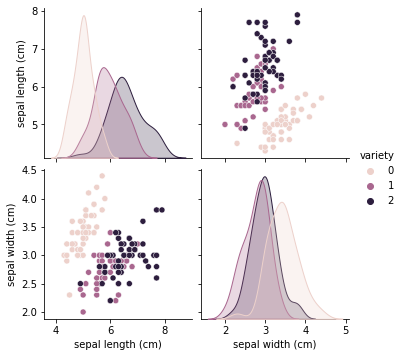

In [ ]:
# строим график зависимости между признаками
import seaborn as sns
sns.pairplot(df_iris[['sepal length (cm)','sepal width (cm)','variety']], hue = 'variety')

In [ ]:
# видно, что точки сортов 1-Versicolor и 2—Virginica перемешаны между собой

In [ ]:
# Корреляция Пирсона - отрицательная.
# Длина и ширина чашечки не связаны от слова совсем. Не самые лучшие признаки для включения в модель обучения
df_iris[['sepal length (cm)','sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


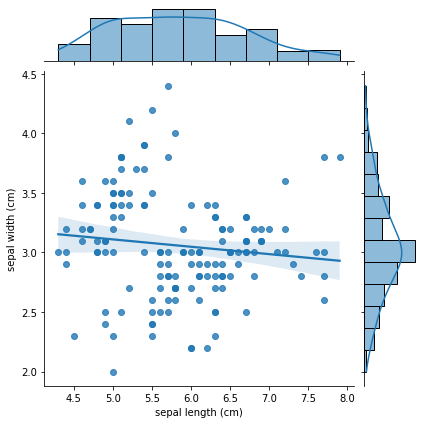

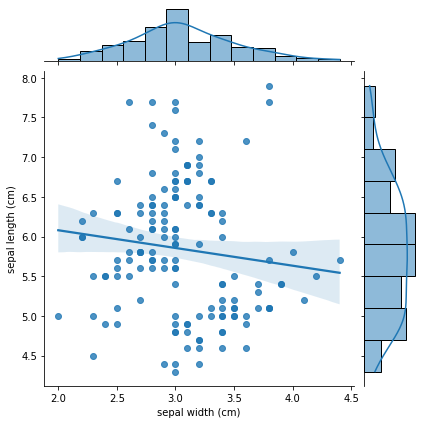

In [ ]:
# хотя распределение можно считать нормальным
sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=df_iris, kind='reg')
sns.jointplot(x='sepal width (cm)', y='sepal length (cm)', data=df_iris, kind='reg')

In [ ]:
# загружаем модуль для обучения
from sklearn.model_selection import train_test_split

In [ ]:
# разделяем данные на тестовые и тренировочные в соотношении 20/80
X_train, X_test, y_train, y_test = train_test_split(df_iris, data_class, test_size=0.2)
print('Тестовая выборка:', len(y_test))
print('Обучающаяся выборка:', len(y_train))

Тестовая выборка: 30
Обучающаяся выборка: 120


In [ ]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 1, 2, 0,
       0, 1, 2, 2, 0, 2, 2, 1])

In [ ]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# result

In [ ]:
# импортируем функцию оценки качества
from sklearn.metrics import accuracy_score

# оцениваем прогноз
accuracy_score(y_test, lda.predict(X_test))

0.8

In [ ]:
# визуализируем дискриминантные линии для тестовой выборки
small_test = X_test[['sepal length (cm)', 'sepal width (cm)']]

# small_train = X_train[['sepal length (cm)', 'sepal width (cm)']]

In [ ]:
# определяем центроиды
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_test, y_test)
lda_small.means_

array([[4.80909091, 3.32727273],
       [5.97272727, 2.69090909],
       [6.4875    , 3.0375    ]])

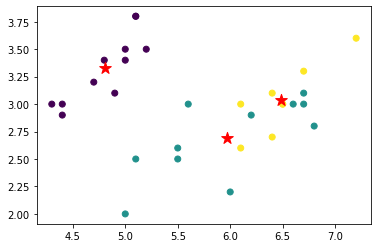

In [ ]:
# визуализируем тестовую выборку и центроиды
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=y_test)

plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

In [ ]:
# несмотря на не совсем плохой прогноз, я бы не брал эти признаки для предсказания

***Метод локтя***

In [ ]:
# определяем столбцы для подбора количества кластеров
x = df_iris.iloc[:, [0,1]].values

In [ ]:
from sklearn.cluster import KMeans
# создаем список для инерции
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    # добавляем инерцию каждой модели в список
    wcss.append(kmeans.inertia_)

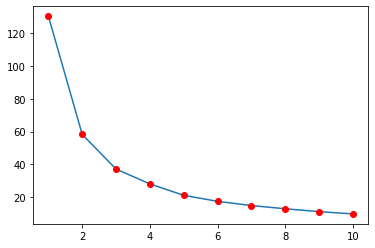

In [ ]:
plt.plot(range(1, 11), wcss)
plt.plot(range(1, 11), wcss ,'ro')
# кол-во кластеров выбираем по длине "локтя"
# видим, что больше 3-х кластеров смысла брать нет

In [ ]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

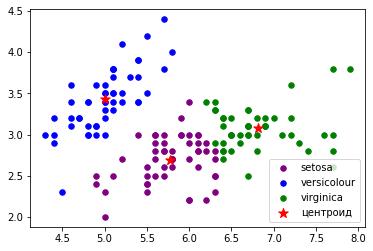

In [ ]:
# визуализируем полученную кластеризацию
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 30, c = 'purple', label = 'setosa')
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 30, c = 'blue', label = 'versicolour')
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 30, c = 'green', label = 'virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', marker='*', label = 'центроид')

plt.legend()